In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from config_images import *
import matplotlib.gridspec as gridspec

/home/rcarrasco/miniconda3/envs/my_python/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#save_path = "/home/rodrigo/supernovae_detection/simulated_data/image_sequences/"
save_path = "/home/rcarrasco/simulated_data/image_sequences/"
f = h5py.File(save_path+"complete_june1_erf_distr2500.hdf5", "r")
fields = list(f.keys())
#stats = np.load("/home/toshiba/rodrigo/simulated_lightcurves/multiclass_SNLS_short20000.pkl")

In [3]:
one_point_detected = 0
total_lc = 0
for field in fields:
    limmag = f[field]["obs_cond"]["limmag3"]["g"][:]
    lightcurves = f[field]["lightcurves"]["g"][:]
    lc_type = f[field]["lc_type"][:]
    for lc_index in range(lightcurves.shape[0]):
        if lc_type[lc_index] == "EmptyLightCurve":
            continue
        mag_diff = limmag - lightcurves[lc_index, :]
        if np.sum(mag_diff>0):
            one_point_detected += 1
        total_lc += 1
print("detected lc: "+str(one_point_detected))
print("total lc: "+str(total_lc))
print("percentage "+str(one_point_detected/np.float(total_lc)*100))

detected lc: 730877
total lc: 735000
percentage 99.43904761904761


In [4]:
field = "Field09"
print(list(f[field].keys()))
print(list(f[field]["obs_cond"].keys()))
print(list(f[field]["count_lightcurves"]["g"].shape))
#print(list(f[field]["lc_type"]))
lc_type = f[field]["lc_type"][:]
galaxy_flag = f[field]["galaxy_flag"][:]
m_lightcurves = f[field]["lightcurves"]["g"][:]
images = f[field]["images"]["g"][:]
obs_days = f[field]["obs_cond"]["obs_day"]["g"][:]
limmag = f[field]["obs_cond"]["limmag5"]["g"][:]

['count_lightcurves', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
['airmass', 'epoch', 'exp_time', 'filter', 'good_quality_points', 'limmag3', 'limmag5', 'obs_day', 'seeing', 'sky_brightness', 'zero_point']
[17500, 25]


5.6178604e-05


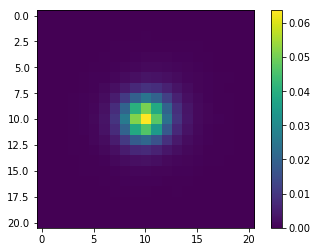

3.23607e-05


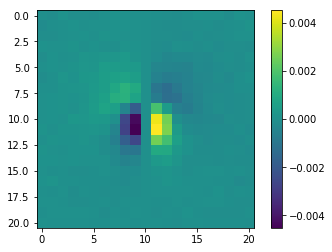

3.23607e-05


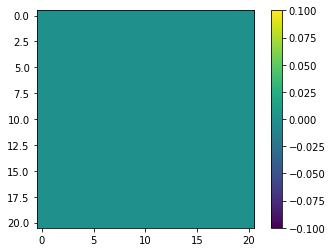

5.6178604e-05


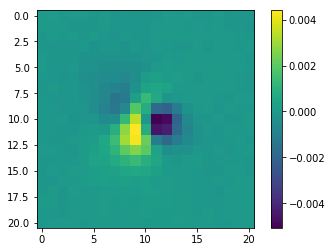

3.23607e-05


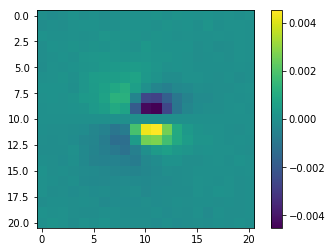

-1.0711823e-05


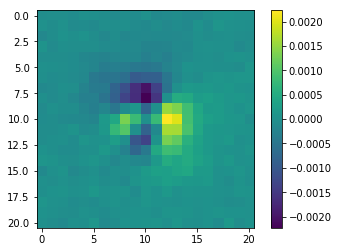

-1.0711823e-05


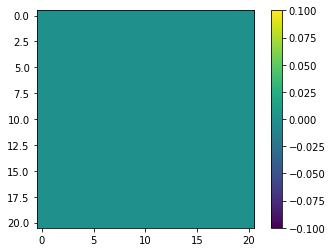

3.4298206e-05


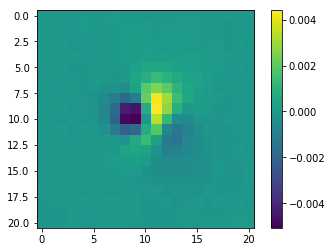

3.23607e-05


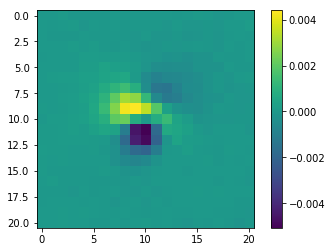

-1.0711823e-05


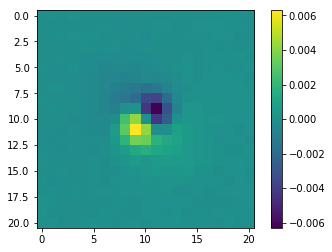

3.23607e-05


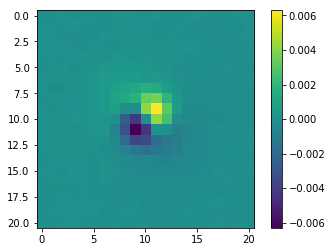

5.6178604e-05


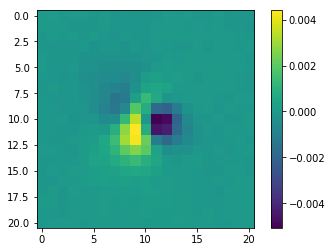

5.6178604e-05


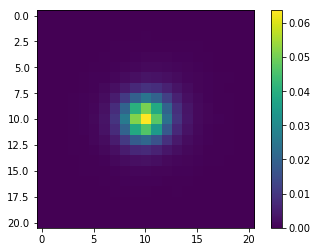

3.4298206e-05


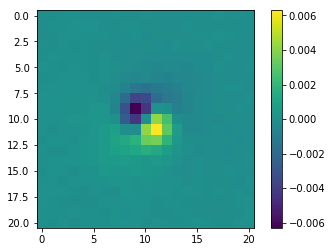

-1.0711823e-05


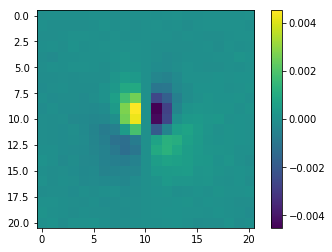

3.4298206e-05


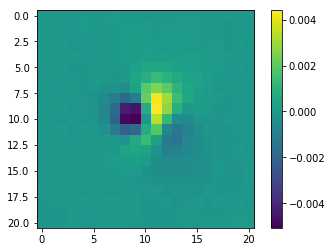

-1.0711823e-05


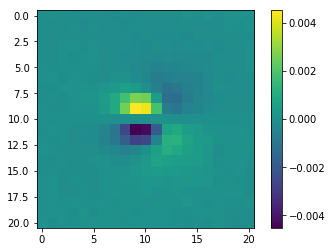

3.4298206e-05


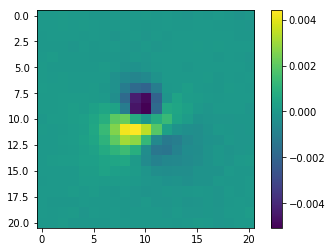

-1.0711823e-05


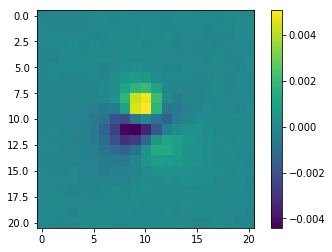

3.4298206e-05


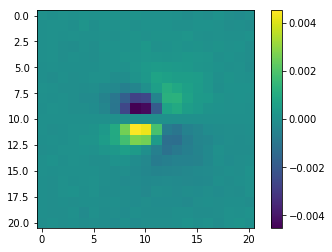

3.23607e-05


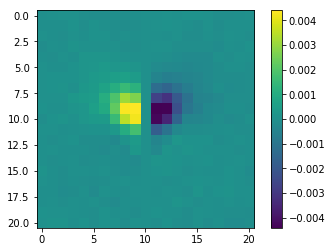

3.23607e-05


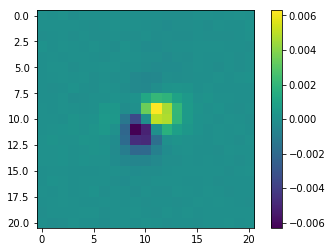

3.23607e-05


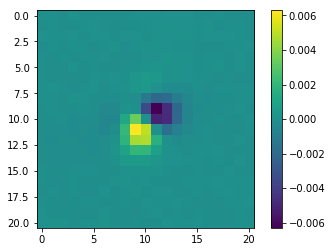

-1.0711823e-05


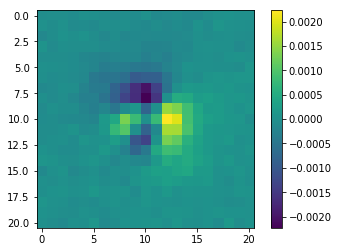

5.6178604e-05


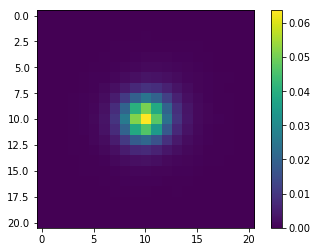

3.23607e-05


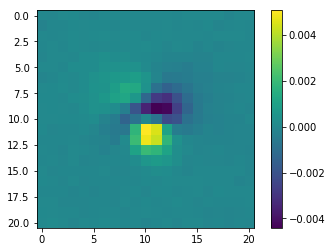

5.6178604e-05


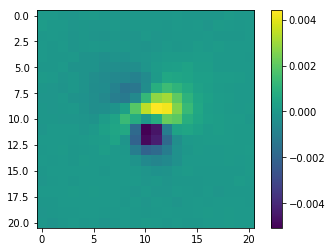

-1.0711823e-05


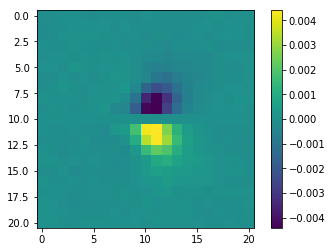

5.6178604e-05


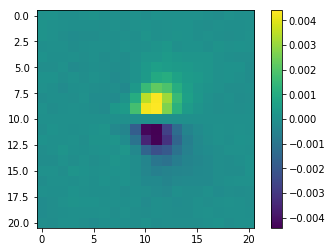

-1.0711823e-05


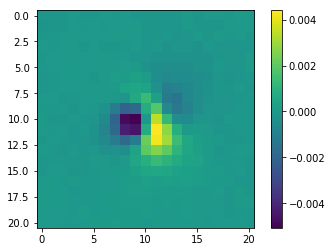

3.23607e-05


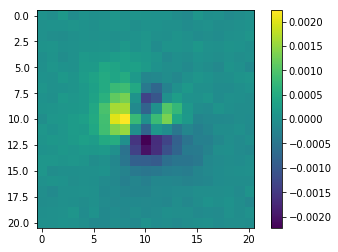

5.6178604e-05


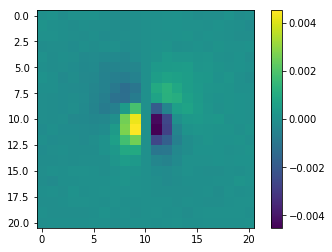

3.23607e-05


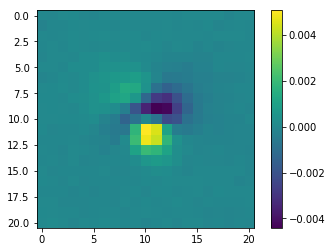

5.6178604e-05


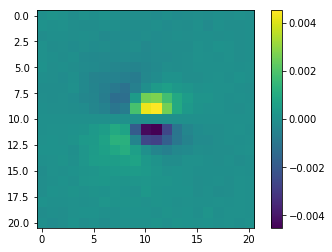

3.23607e-05


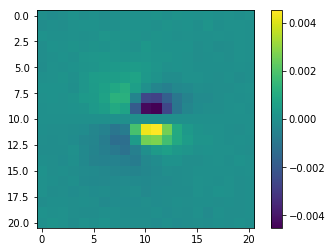

3.23607e-05


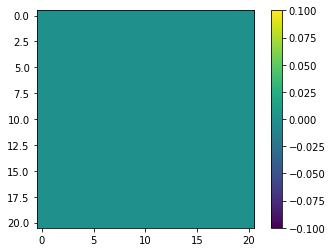

In [5]:
psfs = f[field]["psf_image"]["g"][:]
psfs.shape
for i in range(3):
    psf = np.zeros(shape=(21,21))
    for time in range(12):
        plt.imshow(psfs[i,:,:,time]-psf)
        print(np.amax(psfs[i,0,0,time]))
        plt.colorbar()
        plt.show()
        psf = psfs[i,:,:,time]

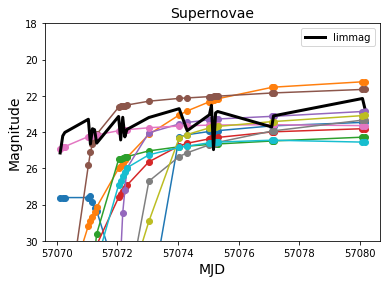

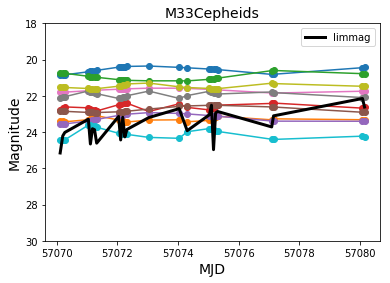

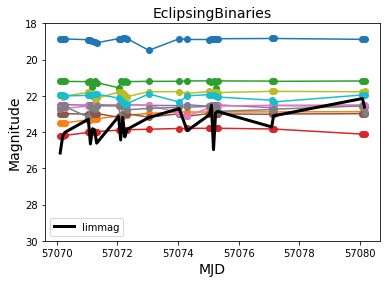

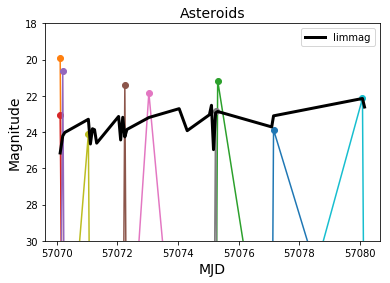

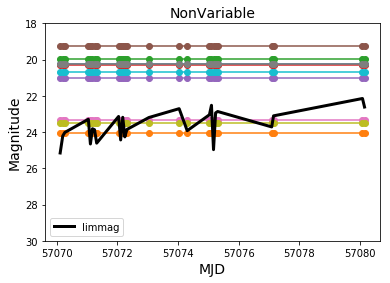

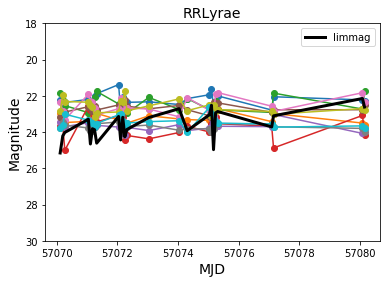

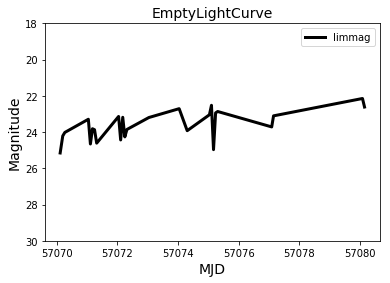

In [8]:
class_to_plot = ["Supernovae", 'M33Cepheids', 'EclipsingBinaries', 'Asteroids', 'NonVariable', 'RRLyrae', 'EmptyLightCurve']
for cl in class_to_plot:
    sn_ids = np.where(lc_type==cl)[0]
    for sn_id in sn_ids[:10]:
        plt.plot(obs_days, m_lightcurves[sn_id, :], "-o")
    plt.plot(obs_days, limmag, "k", lw=3, label="limmag")
    plt.legend()
    plt.title(cl, fontsize=14)
    plt.xlabel("MJD", fontsize=14)
    plt.ylabel("Magnitude", fontsize=14)
    plt.ylim([30, 18])
    plt.show()

In [108]:
class_to_plot = ["Supernovae", 'M33Cepheids', 'EclipsingBinaries', 'Asteroids', 'NonVariable', 'RRLyrae', 'EmptyLightCurve']
sn_ids = np.where(lc_type=="EmptyLightCurve")[0]
#for i in sn_ids:
#    print(np.mean(m_lightcurves[i, :]), i)
sn_with_galaxies = sn_ids[galaxy_flag[sn_ids]==1]
print(sn_with_galaxies)
for sn_id in sn_with_galaxies:
    print(np.min(m_lightcurves[sn_id, :]), sn_id)

[ 31  39  41  54  61  62  70  79  91 100 126 134 157 172 224 231 233 234
 254 260 280 286 302 325 337]
50.0 31
50.0 39
50.0 41
50.0 54
50.0 61
50.0 62
50.0 70
50.0 79
50.0 91
50.0 100
50.0 126
50.0 134
50.0 157
50.0 172
50.0 224
50.0 231
50.0 233
50.0 234
50.0 254
50.0 260
50.0 280
50.0 286
50.0 302
50.0 325
50.0 337


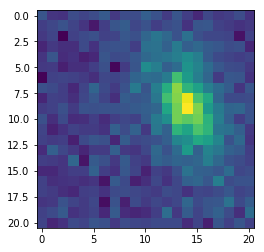

In [143]:
plt.imshow(images[54,:,:,20])
plt.show()

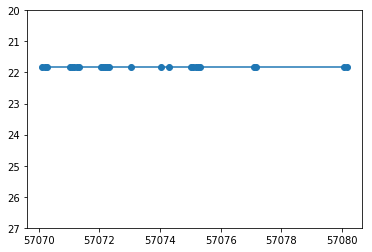

In [97]:
plt.plot(obs_days, m_lightcurves[259, :], "-o")
#print(np.argmin(m_lightcurves[93, :]))
plt.ylim([27,20])
plt.show()

In [145]:
sn_id = 163
rr_id = 223
ceph_id = 68
eb_id = 71
ast_id = 93
const_id = 259
gal_id = 54
id_list = [sn_id, gal_id,rr_id, ceph_id, eb_id, ast_id, const_id]
print(len(obs_days))

25


In [227]:
n_days = 23
for i, day in enumerate(obs_days[:n_days]):
    plt.figure(figsize=(16,8))
    gs = gridspec.GridSpec(4, 7)
    ax0 = plt.subplot(gs[0:2, :])
    ax1 = plt.subplot(gs[3, 0])
    ax2 = plt.subplot(gs[3, 1])
    ax3 = plt.subplot(gs[3, 2])
    ax4 = plt.subplot(gs[3, 3])
    ax5 = plt.subplot(gs[3, 4])
    ax6 = plt.subplot(gs[3, 5])
    ax7 = plt.subplot(gs[3, 6])
    ax0.plot(obs_days[:i+1], m_lightcurves[sn_id, :i+1], "-o", lw=2, label="Supernova")
    ax0.plot(obs_days[:i+1], m_lightcurves[rr_id, :i+1], "-x", lw=2, label="RRLyra")
    ax0.plot(obs_days[:i+1], m_lightcurves[ceph_id, :i+1], "-s", lw=2, label="Cepheid")
    ax0.plot(obs_days[:i+1], m_lightcurves[eb_id, :i+1], "-*", lw=2, label="EB")
    ax0.plot(obs_days[:i+1], m_lightcurves[const_id, :i+1], "-^", lw=2, label="NonVariable")
    ax0.plot(obs_days[:i+1], m_lightcurves[ast_id, :i+1], "-D", lw=3, label="Asteroid")
    ax0.plot(obs_days[:n_days], limmag[:n_days], "k-", lw=2, label="limmag")
    ax0.set_ylim([26, 20])
    ax0.set_xlim([np.amin(obs_days[:n_days]), np.amax(obs_days[:n_days])])
    ax0.set_xlabel("obs_days", fontsize=14)
    ax0.set_ylabel("magnitude", fontsize=14)
    ax0.legend()
    ax1.imshow(images[sn_id,:,:,i], vmin=80, vmax=500, cmap="inferno")
    ax1.set_title("Supernova")
    ax1.axis('off')
    print(np.amin(images[sn_id,:,:,:]), np.amax(images[sn_id,:,:,:]))
    ax2.imshow(images[rr_id,:,:,i], vmin=80, vmax=600,cmap="inferno")
    ax2.set_title("RRLyra")
    ax2.axis('off')
    print(np.amin(images[rr_id,:,:,:]), np.amax(images[rr_id,:,:,:]))
    ax3.imshow(images[ceph_id,:,:,i], vmin=80, vmax=600, cmap="inferno")
    ax3.set_title("Cepheid")
    ax3.axis('off')
    print(np.amin(images[ceph_id,:,:,:]), np.amax(images[ceph_id,:,:,:]))
    ax4.imshow(images[eb_id,:,:,i], vmin=80, vmax=600, cmap="inferno")
    ax4.set_title("EB")
    ax4.axis('off')
    print(np.amin(images[eb_id,:,:,:]), np.amax(images[eb_id,:,:,:]))
    ax5.imshow(images[const_id,:,:,i], vmin=80, vmax=600, cmap="inferno")
    ax5.set_title("NonVariable")
    ax5.axis('off')
    print(np.amin(images[const_id,:,:,:]), np.amax(images[const_id,:,:,:]))
    ax6.imshow(images[ast_id,:,:,i], vmin=80, vmax=500, cmap="inferno")
    ax6.set_title("Asteroid")
    ax6.axis('off')
    print(np.amin(images[ast_id,:,:,:]), np.amax(images[ast_id,:,:,:]))
    ax7.imshow(images[gal_id,:,:,i], vmin=80, vmax=300, cmap="inferno")
    ax7.set_title("Galaxy")
    ax7.axis('off')
    print(np.amin(images[gal_id,:,:,:]), np.amax(images[gal_id,:,:,:]))
    plt.savefig("plots/image"+str(i).zfill(2)+".png")
    plt.close("all")

90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0
90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0
90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0
90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0
90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0
90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0
90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0
90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0
90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0
90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0
90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0
90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0
90.0 939.0
85.0 819.0
87.0 872.0
88.0 814.0
85.0 730.0
87.0 665.0
85.0 714.0